# ANÁLISIS EXPLORATORIO DE DATOS

In [92]:
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
from folium.plugins import HeatMap

---

## siniestros_caba.parquet

In [93]:
contenido_siniestros_caba= '_data/siniestros_caba.parquet'
siniestros_caba = pd.read_parquet(contenido_siniestros_caba)

---

## ANÁLISIS GENERAL

### ESTADÍSTICAS

In [94]:
siniestros_caba.head()

,DIA_SEMANA,FECHA,HORA,FRANJA_HORA,FRANJA,COMUNA,BARRIO,TIPO_CALLE,CALLE,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,N_VICTIMAS,VICTIMA,ROL,SEXO_VICTIMA,EDAD,RANGO_ETARIO
0,Viernes,2016-01-01,04:00:00,4.0,00:00-06:00,Comuna 8,VILLA RIACHUELO,AVENIDA,PIEDRA BUENA AV.,-58.475340,-34.687570,MOTO-AUTO,AUTO,1,MOTO,CONDUCTOR,MASCULINO,19.0,Entre 15 & 30
1,Sábado,2016-01-02,01:15:00,1.0,00:00-06:00,Comuna 9,None,GRAL PAZ,"PAZ, GRAL. AV.",-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,1,AUTO,CONDUCTOR,MASCULINO,70.0,Entre 60 & 75
2,Domingo,2016-01-03,07:00:00,7.0,06:00-12:00,Comuna 1,CONSTITUCION,AVENIDA,ENTRE RIOS AV.,-58.390403,-34.631894,MOTO-AUTO,AUTO,1,MOTO,CONDUCTOR,MASCULINO,30.0,Entre 30 & 45
3,Domingo,2016-01-10,00:00:00,0.0,00:00-06:00,Comuna 8,VILLA LUGANO,AVENIDA,LARRAZABAL AV.,-58.465039,-34.680930,MOTO-SD,SD,1,MOTO,CONDUCTOR,MASCULINO,18.0,Entre 15 & 30
4,Jueves,2016-01-21,05:20:00,5.0,00:00-06:00,Comuna 1,CONSTITUCION,AVENIDA,SAN JUAN AV.,-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,1,MOTO,CONDUCTOR,MASCULINO,29.0,Entre 15 & 30


In [95]:
siniestros_caba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DIA_SEMANA     717 non-null    object        
 1   FECHA          717 non-null    datetime64[ns]
 2   HORA           717 non-null    object        
 3   FRANJA_HORA    716 non-null    float64       
 4   FRANJA         717 non-null    object        
 5   COMUNA         717 non-null    object        
 6   BARRIO         681 non-null    object        
 7   TIPO_CALLE     717 non-null    object        
 8   CALLE          717 non-null    object        
 9   LONGITUD       712 non-null    float64       
 10  LATITUD        712 non-null    float64       
 11  PARTICIPANTES  717 non-null    object        
 12  ACUSADO        717 non-null    object        
 13  N_VICTIMAS     717 non-null    int64         
 14  VICTIMA        717 non-null    object        
 15  ROL            717 non-

In [96]:
siniestros_caba.describe()

,FECHA,FRANJA_HORA,LONGITUD,LATITUD,N_VICTIMAS,EDAD
count,717,716.000000,712.000000,712.000000,717.000000,664.000000
mean,2018-09-11 02:24:36.150627584,11.544693,-58.441786,-34.619667,1.061367,42.167169
min,2016-01-01 00:00:00,0.000000,-58.529942,-34.705250,1.000000,1.000000
25%,2017-04-03 00:00:00,6.000000,-58.476556,-34.643918,1.000000,27.000000
50%,2018-07-10 00:00:00,11.000000,-58.444513,-34.622928,1.000000,37.000000
75%,2019-12-21 00:00:00,17.000000,-58.401995,-34.596799,1.000000,56.250000
max,2021-12-30 00:00:00,23.000000,-58.356082,-34.534654,3.000000,95.000000
std,NaN,6.692817,0.046305,0.035599,0.257024,19.788034


### OUTLIERS

#### Mapa de Correlación

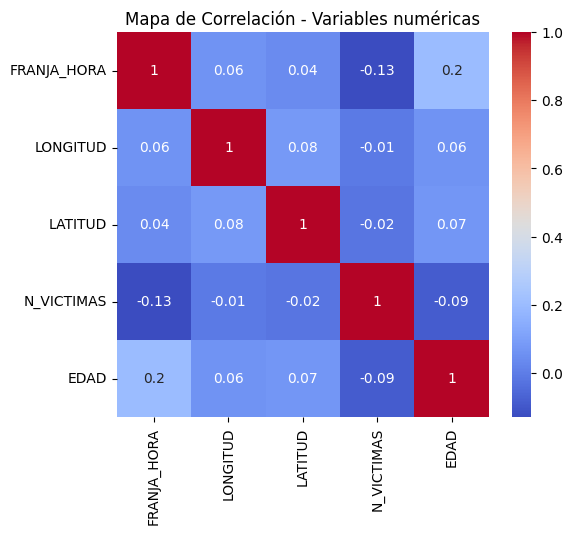

In [97]:
dataNumerica = siniestros_caba.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

El resultado del mapa de calor no retorna información valiosa dado que la relacion entre variabes es escasa, por lo que se debe profundizar en el análisis de la base de datos de siniestros.

#### Estadísticas descriptivas

- A continuacion se estudiarán las columnas numéricas para conocer mas sobre ellas. Es importante saber que `LATITUD` y `LONGITUD` ya fueron filtradas en el ETL confinando todos sus valores al area de la Ciudad Autonoma de Buenos Aires. 

In [98]:
siniestros_caba['FRANJA_HORA'] = pd.to_numeric(siniestros_caba['FRANJA_HORA'], errors='coerce')
siniestros_caba['FRANJA_HORA'].describe()

count    716.000000
mean      11.544693
std        6.692817
min        0.000000
25%        6.000000
50%       11.000000
75%       17.000000
max       23.000000
Name: FRANJA_HORA, dtype: float64

Para `FRANJA_HORA` no se encuentran outliers, ya que al tratarse de un valor que posee un maximo y un minimo, y al no salirse de dichos valores, cualquier incoherencia sería muy dificil identificar.

In [99]:
siniestros_caba_aux = siniestros_caba.copy()
siniestros_caba_aux['EDAD'] = siniestros_caba_aux['EDAD'].replace('SD', np.nan)
siniestros_caba_aux['EDAD'].describe()

count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64

In [100]:
siniestros_caba['N_VICTIMAS'].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

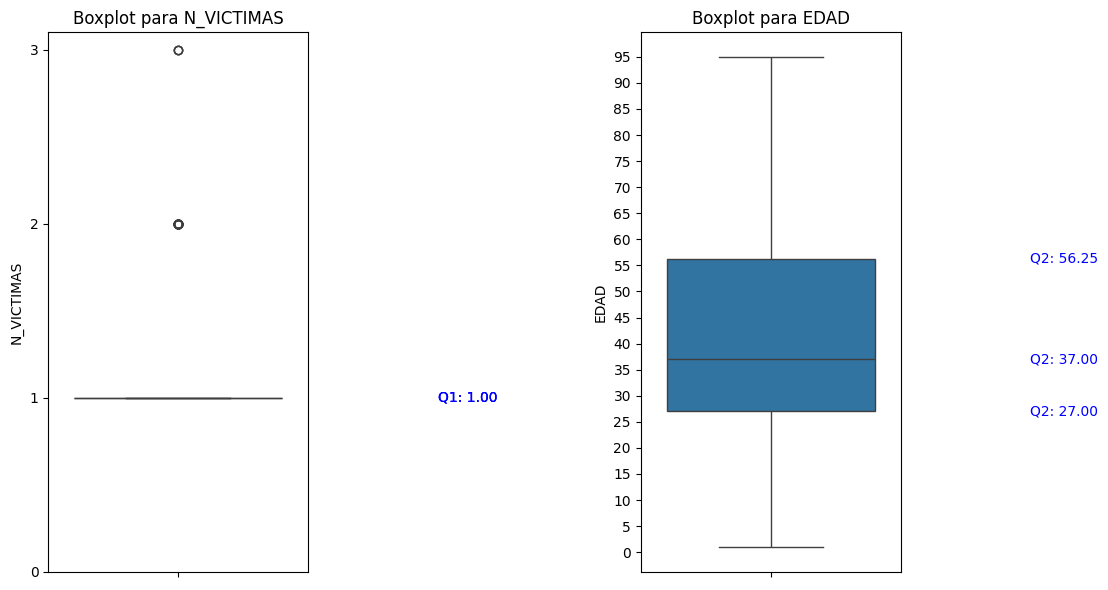

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(y=siniestros_caba['N_VICTIMAS'], ax=axes[0])
axes[0].set_title('Boxplot para N_VICTIMAS')
axes[0].set_ylabel('N_VICTIMAS')
axes[0].set_yticks(range(0, max(siniestros_caba['N_VICTIMAS'])+1, 1)) 

sns.boxplot(y=siniestros_caba_aux['EDAD'], ax=axes[1])
axes[1].set_title('Boxplot para EDAD')
axes[1].set_ylabel('EDAD')
axes[1].set_yticks(range(0, int(max(siniestros_caba_aux['EDAD']))+1, 5)) 

summary_n_victimas = siniestros_caba['N_VICTIMAS'].describe()
summary_edad = siniestros_caba_aux['EDAD'].describe()

for i, (ax, summary) in enumerate(zip(axes, [summary_n_victimas, summary_edad])):
    for quartile, value in zip(['25%', '50%', '75%'], summary[['25%', '50%', '75%']]):
        ax.text(1, value, f'Q{i+1}: {value:.2f}', va='center', ha='left', color='blue', fontsize=10)

plt.tight_layout()
plt.show()

- Dado los posibles outliers de 2 y 3 en `N_VICTIMAS`, que se encuentran fuera de la media, se los analizará con mas detenimiento. 

In [102]:
indice_max_n_victimas = siniestros_caba['N_VICTIMAS'].idxmax()
fila_max_n_victimas = siniestros_caba.loc[indice_max_n_victimas]
print("Fila con el máximo valor en 'N_VICTIMAS':")
print(fila_max_n_victimas)

Fila con el máximo valor en 'N_VICTIMAS':
DIA_SEMANA                               Jueves
FECHA                       2017-03-23 00:00:00
HORA                                   05:00:00
FRANJA_HORA                                 5.0
FRANJA                              00:00-06:00
COMUNA                                 Comuna 1
BARRIO                            PUERTO MADERO
TIPO_CALLE                              AVENIDA
CALLE            ACHAVAL RODRIGUEZ, T., DR. AV.
LONGITUD                             -58.358815
LATITUD                              -34.611136
PARTICIPANTES                  AUTO-OBJETO FIJO
ACUSADO                             OBJETO FIJO
N_VICTIMAS                                    3
VICTIMA                                    AUTO
ROL                                   CONDUCTOR
SEXO_VICTIMA                          MASCULINO
EDAD                                       28.0
RANGO_ETARIO                      Entre 15 & 30
Name: 172, dtype: object


In [103]:
condicion_fecha = (siniestros_caba['FECHA'] == '2017-03-23')
condicion_barrio = (siniestros_caba['BARRIO'] == 'PUERTO MADERO')
condicion_comuna = (siniestros_caba['COMUNA'] == 'Comuna 1')
condiciones_totales = condicion_fecha & condicion_barrio & condicion_comuna
resultados = siniestros_caba[condiciones_totales]
resultados.head()

,DIA_SEMANA,FECHA,HORA,FRANJA_HORA,FRANJA,COMUNA,BARRIO,TIPO_CALLE,CALLE,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,N_VICTIMAS,VICTIMA,ROL,SEXO_VICTIMA,EDAD,RANGO_ETARIO
172,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,CONDUCTOR,MASCULINO,28.0,Entre 15 & 30
173,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,32.0,Entre 30 & 45
174,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,30.0,Entre 30 & 45


Aquí se ve que el siniestro aparece 3 veces, por lo que aunque se puede inferir que no es un outlier, se ve claramente que la cantidad de victimas se multiplica, haciendo que la sumatoria de victimas totales aumente sin aportar un valor correcto para posterior análisis.
Para solucionarlo se puede cambiar el numero de victimas de cada uno de ellos, o borrar 2, pero en el ultimo caso se perdería información acerca de los datos de cada uno de los involucrados.
Por otro lado esto deja en evidencia que los accidentes con multiples victimas pueden proporcionar el mismo error que se encuentra aqui, por lo que se tendrán que analizar los demás siniestros que un numero de victimas mayor a 2.

#### Análisis `N_VICTIMAS` > a 1

In [104]:
condicion_N_VICTIMAS = (siniestros_caba['N_VICTIMAS'] > 1)
count_condicion_N_VICTIMAS = condicion_N_VICTIMAS.sum()
print(f"Cantidad de filas donde N_VICTIMAS > 1: {count_condicion_N_VICTIMAS}")
condicion_N_VICTIMAS = (siniestros_caba['N_VICTIMAS'] > 1)
filas_cumplen_condicion = siniestros_caba[condicion_N_VICTIMAS]
filas_cumplen_condicion.head(11)

Cantidad de filas donde N_VICTIMAS > 1: 41


,DIA_SEMANA,FECHA,HORA,FRANJA_HORA,FRANJA,COMUNA,BARRIO,TIPO_CALLE,CALLE,LONGITUD,LATITUD,PARTICIPANTES,ACUSADO,N_VICTIMAS,VICTIMA,ROL,SEXO_VICTIMA,EDAD,RANGO_ETARIO
29,Martes,2016-03-29,11:00:00,11.0,06:00-12:00,Comuna 7,FLORES,AVENIDA,DIRECTORIO AV.,-58.460766,-34.633504,MOTO-CARGAS,CARGAS,2,MOTO,CONDUCTOR,MASCULINO,54.0,Entre 45 & 60
30,Martes,2016-03-29,11:00:00,11.0,06:00-12:00,Comuna 7,FLORES,AVENIDA,DIRECTORIO AV.,-58.460766,-34.633504,MOTO-CARGAS,CARGAS,2,MOTO,PASAJERO_ACOMPAÑANTE,MASCULINO,NaN,nan
98,Domingo,2016-09-18,22:45:00,22.0,18:00-24:00,Comuna 10,VILLA REAL,CALLE,IRIGOYEN,-58.525721,-34.621259,AUTO-CARGAS,CARGAS,2,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,60.0,Entre 60 & 75
99,Domingo,2016-09-18,22:45:00,22.0,18:00-24:00,Comuna 10,VILLA REAL,CALLE,IRIGOYEN,-58.525721,-34.621259,AUTO-CARGAS,CARGAS,2,AUTO,CONDUCTOR,MASCULINO,37.0,Entre 30 & 45
162,Domingo,2017-02-26,05:15:00,5.0,00:00-06:00,Comuna 4,NUEVA POMPEYA,AVENIDA,"MORENO, PERITO AV.",-58.418428,-34.649791,AUTO-OBJETO FIJO,OBJETO FIJO,2,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,23.0,Entre 15 & 30
163,Domingo,2017-02-26,05:15:00,5.0,00:00-06:00,Comuna 4,NUEVA POMPEYA,AVENIDA,"MORENO, PERITO AV.",-58.418428,-34.649791,AUTO-OBJETO FIJO,OBJETO FIJO,2,AUTO,CONDUCTOR,MASCULINO,19.0,Entre 15 & 30
172,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,CONDUCTOR,MASCULINO,28.0,Entre 15 & 30
173,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,32.0,Entre 30 & 45
174,Jueves,2017-03-23,05:00:00,5.0,00:00-06:00,Comuna 1,PUERTO MADERO,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",-58.358815,-34.611136,AUTO-OBJETO FIJO,OBJETO FIJO,3,AUTO,PASAJERO_ACOMPAÑANTE,MASCULINO,30.0,Entre 30 & 45
175,Miércoles,2017-03-29,18:00:00,18.0,18:00-24:00,Comuna 12,VILLA PUEYRREDON,GRAL PAZ,"PAZ, GRAL. AV.",-58.514523,-34.581598,MOTO-PASAJEROS,PASAJEROS,2,MOTO,PASAJERO_ACOMPAÑANTE,FEMENINO,NaN,nan


Claramente se ve que los hechos que poseen un valor `N_VICTIMAS` > a 1, se repiten y aumentan el numero de victimas, generando un dato erroneo en un análisis posterior. 
Para corregir esto, se modificará la cantidad de victimas a 1 en cada ocurrencia. Es importante saber que si se debiera contar la cantidad de siniestros, estos deberían ser filtrados para que no se cometa el mismo error que podría cometerse multiplizando la cantidad de victimas por accidente que se vió anteriormente.

- Modificacion de `N_VICTIMAS` > a 1

In [105]:
condicion_N_VICTIMAS = (siniestros_caba['N_VICTIMAS'] > 1)
siniestros_caba.loc[condicion_N_VICTIMAS, 'N_VICTIMAS'] = 1
condicion_N_VICTIMAS = (siniestros_caba['N_VICTIMAS'] > 1)
count_condicion_N_VICTIMAS = condicion_N_VICTIMAS.sum()
print(f"Cantidad de filas donde N_VICTIMAS > 1: {count_condicion_N_VICTIMAS}")

Cantidad de filas donde N_VICTIMAS > 1: 0


Luego de la primera parte del análisis se concluye que los outliers encontrados en `N_VICTIMAS` representan un posible error metodologico en la recoleccion de datos pero no impedirán el trabajo posterior ya que se han corregidos. 
En `EDAD` no puede observarse valores extremos fuera de la demografía propia de la Ciudad de Buenos Aires. Los valores altos solo representan casos inusuales pero no errores en la muestra. 

---
---

## GEOLOCALIZACION

Para evitar errores en los datos cualitativos, se decide reemplazar los valores `SD` (sin dato), por un valor `NaN`.

In [106]:
try:
    siniestros_caba = siniestros_caba_aux.replace('SD', np.nan)
except Exception as e:
    print(f"Error: {e}")

A continuación se ubicarán los accidentes en un mapa de Bs. As., en sus comunas y respectivos barrios identificando lugares con mayores siniestralidad.

In [107]:
def geoloc_barrios():
    ruta_archivo = '_data/barrios.geojson'
    barrios = gpd.read_file(ruta_archivo)
    siniestros_caba['geometry'] = siniestros_caba.apply(lambda x: Point((float(x.LONGITUD), float(x.LATITUD))), axis=1)
    gdf_siniestros = gpd.GeoDataFrame(siniestros_caba, geometry='geometry')
    siniestros_en_barrios = gpd.sjoin(gdf_siniestros, barrios, how="inner", op='intersects')
    siniestros_caba['BARRIO'] = siniestros_en_barrios['BARRIO']
    siniestros_caba.drop(columns='geometry', inplace=True)

In [108]:
cantidad_barrios = siniestros_caba['BARRIO'].nunique()
print(f"La cantidad de barrios únicos en la columna 'BARRIO' es: {cantidad_barrios}")
barrios_unicos = siniestros_caba['BARRIO'].unique()
print("Los barrios únicos en la columna 'BARRIO' son:")
print(barrios_unicos)


La cantidad de barrios únicos en la columna 'BARRIO' es: 48
Los barrios únicos en la columna 'BARRIO' son:
['VILLA RIACHUELO' None 'CONSTITUCION' 'VILLA LUGANO' 'VILLA SOLDATI'
 'VILLA DEL PARQUE' 'MONSERRAT' 'BARRACAS' 'VILLA CRESPO' 'MATADEROS'
 'SAN NICOLAS' 'FLORES' 'SAAVEDRA' 'PARQUE CHACABUCO' 'NUEVA POMPEYA'
 'BALVANERA' 'CHACARITA' 'BELGRANO' 'VILLA URQUIZA' 'PALERMO'
 'VELEZ SARSFIELD' 'CABALLITO' 'RECOLETA' 'SAN CRISTOBAL' 'FLORESTA'
 'PATERNAL' 'NUÑEZ' 'LINIERS' 'ALMAGRO' 'VILLA DEVOTO' 'PARQUE AVELLANEDA'
 'RETIRO' 'VILLA ORTUZAR' 'VILLA LURO' 'VILLA REAL' 'BOEDO' 'BOCA'
 'PARQUE PATRICIOS' 'VERSALLES' 'VILLA SANTA RITA' 'COGHLAN' 'SAN TELMO'
 'VILLA GRAL. MITRE' 'PUERTO MADERO' 'VILLA PUEYRREDON' 'PARQUE CHAS'
 'COLEGIALES' 'AGRONOMIA' 'MONTE CASTRO']


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/653190157.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')


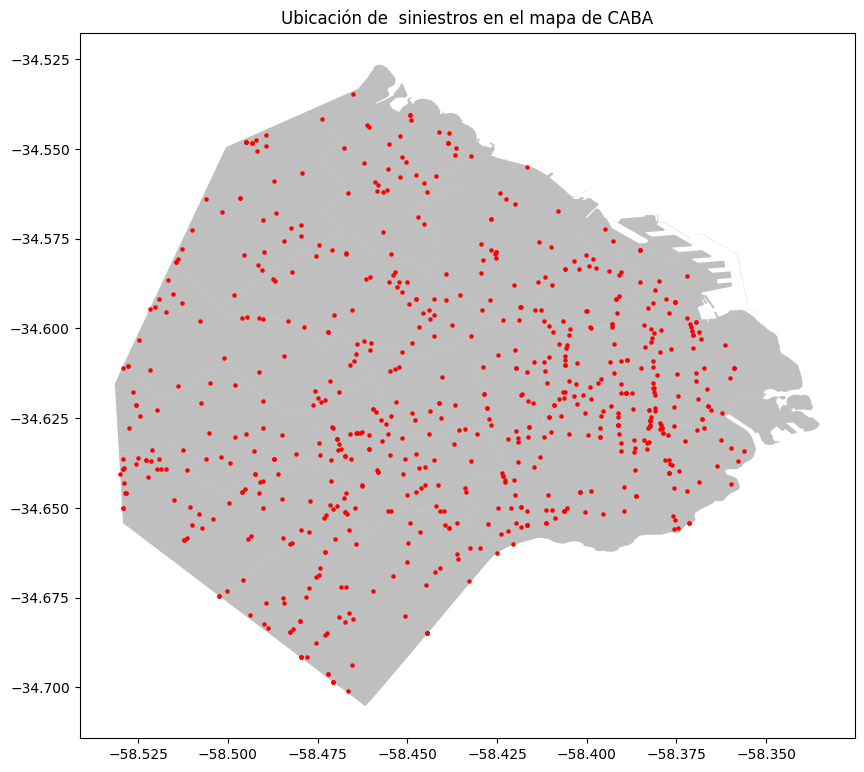

In [109]:
ruta_geojson = '_data/comunas.geojson'

geometry = gpd.points_from_xy(siniestros_caba['LONGITUD'], siniestros_caba['LATITUD'])
gdf = gpd.GeoDataFrame(siniestros_caba, geometry=geometry)
mapa_shapefile = gpd.read_file(ruta_geojson)
gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')
fig, ax = plt.subplots(figsize=(10, 10))
mapa_shapefile.plot(ax=ax, alpha=0.5, color='grey')  
gdf_interseccion.plot(ax=ax, color='red', markersize=5) 
plt.title('Ubicación de  siniestros en el mapa de CABA')
plt.show()

### COMUNAS

In [110]:
ocurrencias_por_comuna = siniestros_caba['COMUNA'].value_counts().sort_values(ascending=False)
ocurrencias_por_comuna.head()

COMUNA
Comuna 1    93
Comuna 4    79
Comuna 9    75
Comuna 8    68
Comuna 7    62
Name: count, dtype: int64

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/1919422423.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')


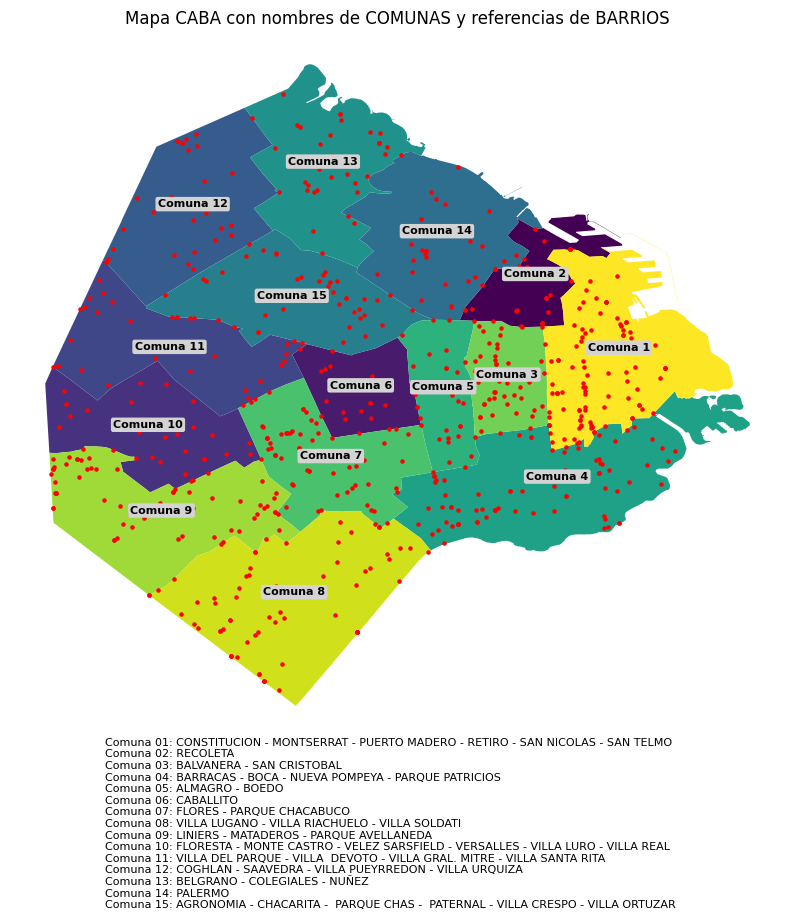

In [111]:
ruta_geojson = '_data/comunas.geojson'
geometry = gpd.points_from_xy(siniestros_caba['LONGITUD'], siniestros_caba['LATITUD'])
gdf = gpd.GeoDataFrame(siniestros_caba, geometry=geometry)
datos_shapefile = gpd.read_file(ruta_geojson)
datos_shapefile['COMUNAS'] = datos_shapefile['COMUNAS'].astype(int)
gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')

fig, ax = plt.subplots(figsize=(10, 15))
datos_shapefile.plot(ax=ax, cmap='viridis') 

for idx, row in datos_shapefile.iterrows():
    etiqueta = f"Comuna {int(row['COMUNAS'])}" 
    plt.annotate(text=etiqueta, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 xytext=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black',weight='bold',
                 bbox=dict(facecolor='lightgrey', edgecolor='none', 
                 boxstyle='round,pad=0.2'))

gdf_interseccion.plot(ax=ax, color='red', markersize=5)  

leyendas = datos_shapefile[['BARRIOS', 'COMUNAS']].drop_duplicates().sort_values(by='COMUNAS')
leyenda_texto = "\n".join([f"Comuna {str(comuna).zfill(2)}: {barrio}" for barrio, comuna in zip(leyendas['BARRIOS'], leyendas['COMUNAS'])])

plt.figtext( 0.22, 0.14, leyenda_texto, fontsize=8,
             ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0, pad=10))
plt.subplots_adjust(bottom=0.1)

plt.title('Mapa CABA con nombres de COMUNAS y referencias de BARRIOS')
plt.axis('off')
plt.show()


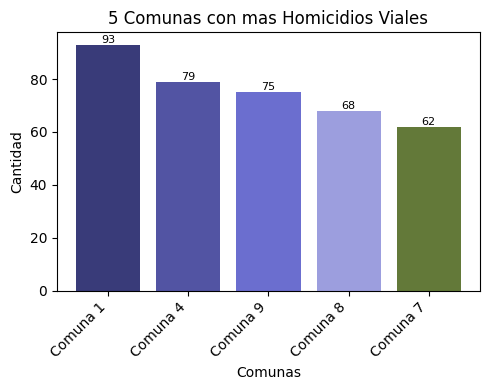

In [112]:
plt.figure(figsize=(5, 4))
top_5_comunas = ocurrencias_por_comuna.head(5)
colores = plt.cm.tab20b(range(len(top_5_comunas)))

plt.bar(top_5_comunas.index, top_5_comunas, color=colores)
plt.xlabel('Comunas')
plt.ylabel('Cantidad')
plt.title('5 Comunas con mas Homicidios Viales')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_5_comunas):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


### BARRIOS

In [113]:
ocurrencias_por_barrio = siniestros_caba['BARRIO'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

BARRIO
FLORES           49
PALERMO          34
BARRACAS         30
BALVANERA        30
NUEVA POMPEYA    30
Name: count, dtype: int64

In [114]:
ocurrencias_por_barrio.describe()

count    48.000000
mean     14.187500
std      10.193148
min       1.000000
25%       7.000000
50%      11.500000
75%      21.250000
max      49.000000
Name: count, dtype: float64

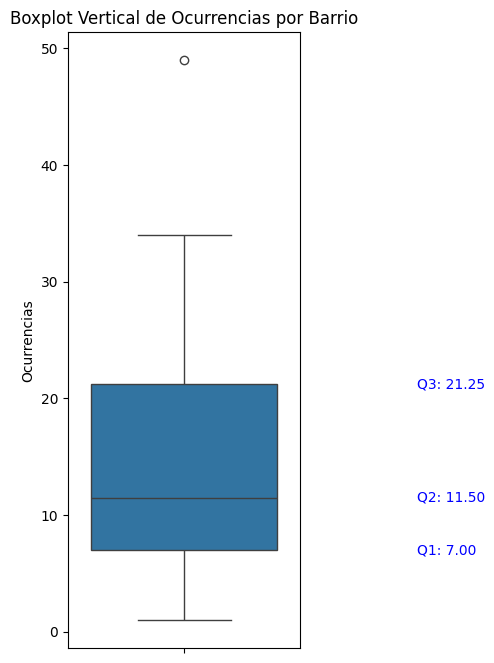

In [115]:
plt.figure(figsize=(3, 8))
sns.boxplot(y=ocurrencias_por_barrio)

for i, value in enumerate(ocurrencias_por_barrio.describe()[['25%', '50%', '75%']]):
    plt.text(1, value, f'Q{i+1}: {value:.2f}', va='center', ha='left', color='blue', fontsize=10)

plt.title('Boxplot Vertical de Ocurrencias por Barrio')
plt.ylabel('Ocurrencias')
plt.show()


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/2339475771.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')


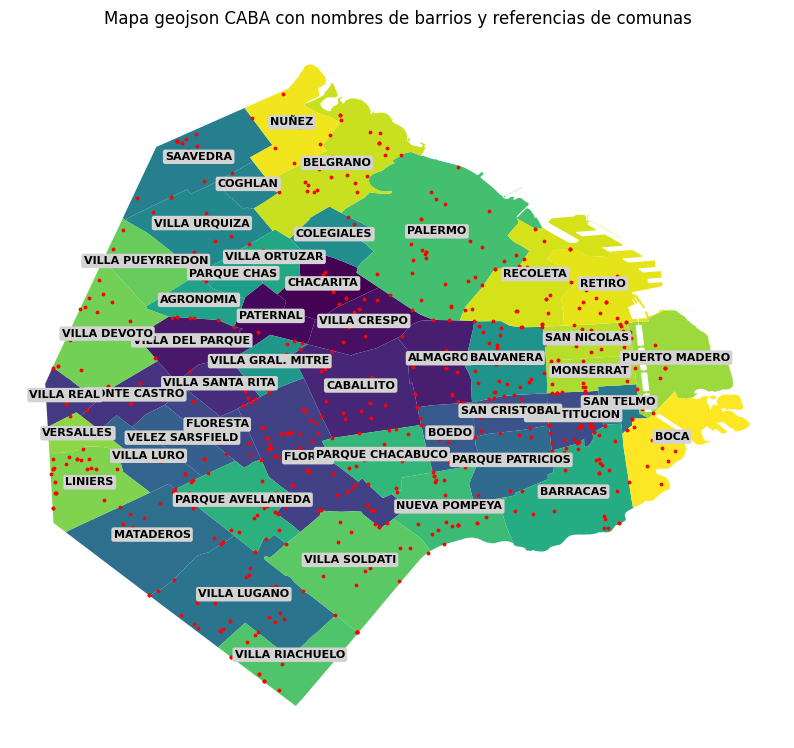

In [116]:
ruta_archivo = '_data/barrios.geojson'

geometry = gpd.points_from_xy(siniestros_caba['LONGITUD'], siniestros_caba['LATITUD'])
gdf = gpd.GeoDataFrame(siniestros_caba, geometry=geometry)
datos_shapefile = gpd.read_file(ruta_archivo)
datos_shapefile['BARRIO'] = datos_shapefile['BARRIO'].astype(str)
gdf_interseccion = gpd.overlay(gdf, mapa_shapefile, how='intersection')

fig, ax = plt.subplots(figsize=(10, 10))
datos_shapefile.plot(ax=ax, cmap='viridis')

for idx, row in datos_shapefile.iterrows():
    etiqueta = f"{str(row['BARRIO'])}" 
    plt.annotate(text=etiqueta, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 xytext=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black',weight='bold',
                 bbox=dict(facecolor='lightgrey', edgecolor='none', 
                 boxstyle='round,pad=0.2'))
    
gdf_interseccion.plot(ax=ax, color='red', markersize=3)  

plt.title('Mapa geojson CABA con nombres de barrios y referencias de comunas')
plt.axis('off') 
plt.show()


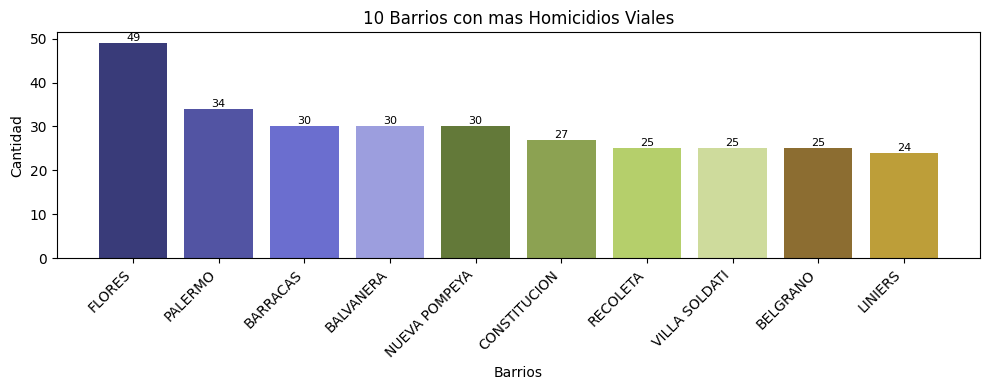

In [117]:
plt.figure(figsize=(10, 4))
top_10_barrios = ocurrencias_por_barrio.head(10)
colores = plt.cm.tab20b(range(len(top_10_barrios)))

plt.bar(top_10_barrios.index, top_10_barrios, color=colores)
plt.xlabel('Barrios')
plt.ylabel('Cantidad')
plt.title('10 Barrios con mas Homicidios Viales')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_10_barrios):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


Conociendo los datos de ubicación, se obtiene que la mayor cantidad de homicidios viales ocurrieron en la `Comuna 1` que corresponde a la del 'Microcentro' de la Ciudad Autonoma de Buenos Aires, la cual es la mas concurrida y con mayor transito. Esto se debe a la gran afluencia de gente en la zona dado que contiene gran cantidad de dependencias gubernamentales, el distrito financiero, oficinas, negocios y además es turistico ya que contiene teatros, bares, restaurants y tambien coincide con el centro historico de la ciudad.

En el caso del barrio de `Flores`, no podria identificarse una causa para confirmar la gran gantidad de accidentes fatales. Incluso se podría ver como un outlier, dado la lejanía respecto del siguiente barrio en la lista y tambien de la media (dato que confirma la desviación standard). Por otro lado el boxplot lo explicita gráficamente. __En conclusión Flores debe ser estudiado con mayor profundidad y tenido en cuenta en futuras estrategias viales.__

---

### CALLES

In [118]:
ocurrencias_por_calle = siniestros_caba['CALLE'].value_counts().sort_values(ascending=False)
ocurrencias_por_calle.head()

CALLE
PAZ, GRAL. AV.                                61
RIVADAVIA AV.                                 20
DEL LIBERTADOR AV.                            19
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
Name: count, dtype: int64

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/1321475010.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_chart = plt.gca().set_xticklabels([label[:18] for label in top_10_calles.index])


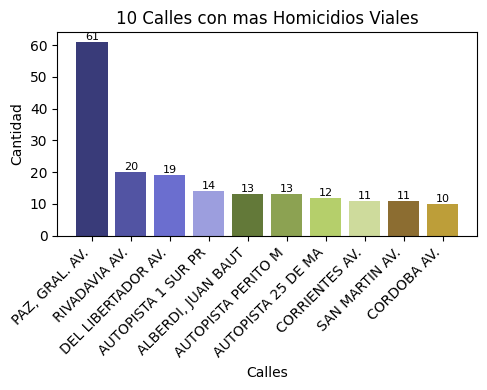

In [119]:
plt.figure(figsize=(5, 4))
top_10_calles = ocurrencias_por_calle.head(10)
colores = plt.cm.tab20b(range(len(top_10_calles)))

plt.bar(top_10_calles.index, top_10_calles, color=colores)
plt.xlabel('Calles')
plt.ylabel('Cantidad')
plt.title('10 Calles con mas Homicidios Viales')
plt.xticks(rotation=45, ha='right')
bar_chart = plt.gca().set_xticklabels([label[:18] for label in top_10_calles.index])

for i, v in enumerate(top_10_calles):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


### TIPO CALLE

In [120]:
ocurrencias_por_tipo_calle = siniestros_caba['TIPO_CALLE'].value_counts().sort_values(ascending=False)
ocurrencias_por_tipo_calle.head()

TIPO_CALLE
AVENIDA      442
CALLE        137
GRAL PAZ      70
AUTOPISTA     68
Name: count, dtype: int64

In [121]:
total_ocurrencias = ocurrencias_por_tipo_calle.sum()
porcentaje_por_tipo_calle = (ocurrencias_por_tipo_calle / total_ocurrencias) * 100
print(f"Porcentaje para todos los tipos excepto 'CALLE': {porcentaje_por_tipo_calle.get('CALLE', 0) - 100:.2f}%")


Porcentaje para todos los tipos excepto 'CALLE': -80.89%


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/3760892827.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_chart = plt.gca().set_xticklabels([label[:18] for label in top_10_tipo_calles.index])


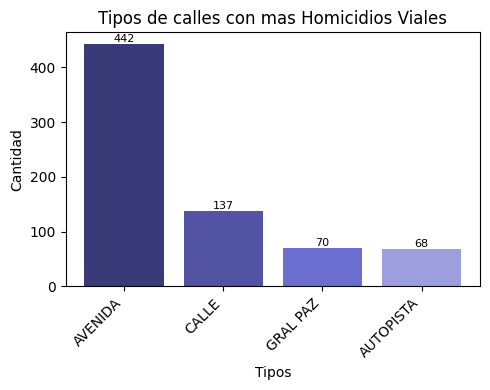

In [122]:
plt.figure(figsize=(5, 4))
top_10_tipo_calles = ocurrencias_por_tipo_calle.head(10)
colores = plt.cm.tab20b(range(len(top_10_tipo_calles)))

plt.bar(top_10_tipo_calles.index, top_10_tipo_calles, color=colores)
plt.xlabel('Tipos')
plt.ylabel('Cantidad')
plt.title('Tipos de calles con mas Homicidios Viales')
plt.xticks(rotation=45, ha='right')
bar_chart = plt.gca().set_xticklabels([label[:18] for label in top_10_tipo_calles.index])

for i, v in enumerate(top_10_tipo_calles):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


El resultado de esta parte del análisis es bastante directo, la `Avenida General Paz` es la que mayor accidentes fatales posee debido a que es la arteria mas concurrida de la Ciudad de Buenos Aires. Esto no es solo por ser una avenida muy utilizada por la población de la ciudad, sino que tambien que es una autopista que une la ciudad con diferentes ciudades del area metropolitana de Buenos Aires, lo que aumenta el flujo vehicular en gran medida, velocidad de tránsito y variedad de transportes que pueden ocacionar siniestros.

Tambien se puede ver que la mayor cantidad de homicidios viales ocurre en `Avenidas` y `Autopistas` (al rededor del 80%), afirmando la tesis del punto anterior y ayudando a concluir que para generar una mejora en dicho aspecto es de gran importancia que sean tenidas en cuenta.

---
---

## Involucrados en los Homicidios

### PARTICIPANTES

In [123]:
ocurrencias_por_participante = siniestros_caba['PARTICIPANTES'].value_counts().sort_values(ascending=False)
ocurrencias_por_participante.head()

PARTICIPANTES
PEATON-PASAJEROS    105
MOTO-AUTO            84
MOTO-CARGAS          80
PEATON-AUTO          79
MOTO-PASAJEROS       50
Name: count, dtype: int64

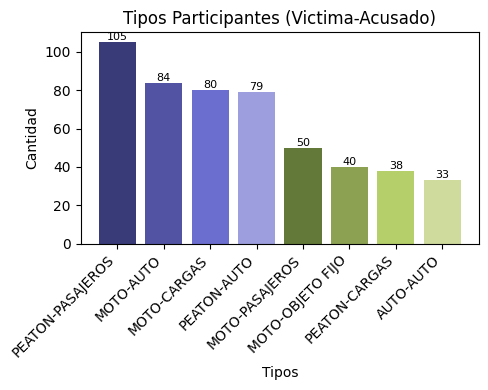

In [124]:
df_ocurrencias_participante = pd.DataFrame(list(ocurrencias_por_participante.items()), columns=['Tipo', 'Cantidad'])
top_5_participantes = df_ocurrencias_participante.head(8)

plt.figure(figsize=(5, 4))
colores = plt.cm.tab20b(range(len(top_5_participantes)))

plt.bar(top_5_participantes['Tipo'], top_5_participantes['Cantidad'], color=colores)
plt.xlabel('Tipos')
plt.ylabel('Cantidad')
plt.title('Tipos Participantes (Victima-Acusado)')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_5_participantes['Cantidad']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


### VICTIMAS

In [125]:
siniestros_filtrado = siniestros_caba[siniestros_caba['VICTIMA'] != 'SD']
ocurrencias_por_victimas = siniestros_filtrado.groupby('VICTIMA')['N_VICTIMAS'].sum().sort_values(ascending=False)
ocurrencias_por_victimas.head(10)

VICTIMA
MOTO           317
PEATON         269
AUTO           112
BICICLETA       29
CARGAS           7
MOVIL            5
PASAJEROS        5
OBJETO FIJO      4
PEATON_MOTO      4
Name: N_VICTIMAS, dtype: int64

### ACUSADO

In [126]:
ocurrencias_por_acusado = siniestros_caba['ACUSADO'].value_counts().sort_values(ascending=False)
ocurrencias_por_acusado.head()

ACUSADO
AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
Name: count, dtype: int64

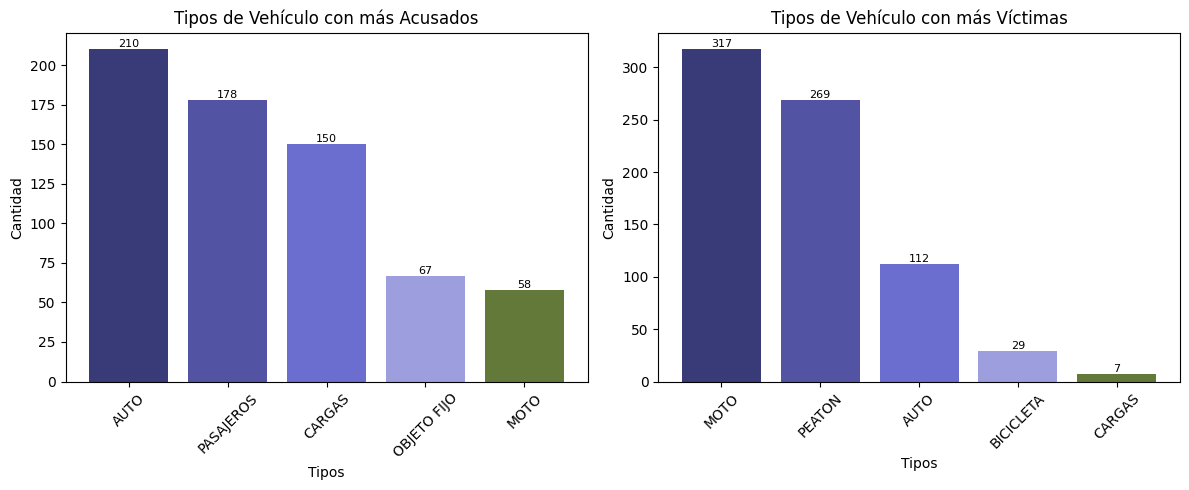

In [127]:
df_ocurrencias_acusados = pd.DataFrame(list(ocurrencias_por_acusado.items()), columns=['Tipo', 'Cantidad'])
df_ocurrencias_victimas = pd.DataFrame(list(ocurrencias_por_victimas.items()), columns=['Tipo', 'Cantidad'])
top_5_tipo_acusados = df_ocurrencias_acusados.head(5)
top_5_tipo_victimas = df_ocurrencias_victimas.head(5)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

colores_acusados = plt.cm.tab20b(range(len(top_5_tipo_acusados)))
axs[0].bar(top_5_tipo_acusados['Tipo'], top_5_tipo_acusados['Cantidad'], color=colores_acusados)
axs[0].set_xlabel('Tipos')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Tipos de Vehículo con más Acusados')
axs[0].tick_params(axis='x', rotation=45)  # Modificado aquí
for i, v in enumerate(top_5_tipo_acusados['Cantidad']):
    axs[0].text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

colores_victimas = plt.cm.tab20b(range(len(top_5_tipo_victimas)))
axs[1].bar(top_5_tipo_victimas['Tipo'], top_5_tipo_victimas['Cantidad'], color=colores_victimas)
axs[1].set_xlabel('Tipos')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Tipos de Vehículo con más Víctimas')
axs[1].tick_params(axis='x', rotation=45)  # Modificado aquí
for i, v in enumerate(top_5_tipo_victimas['Cantidad']):
    axs[1].text(i, v, str(v), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


A partir de este análisis se puede ver que de la relacion entre los participantes de los homicidios viales, resulta en que en la mayoría de los casos los vehiculos de menor porte (incluidos peatones), son las victimas mientras que los de mayor porte, tales como autos, camiones y omnibus son los acusados.

---
---

## SEXO VICTIMAS

In [130]:
ocurrencias_por_sexo = siniestros_caba['SEXO_VICTIMA'].value_counts().sort_values(ascending=False)
ocurrencias_por_sexo.head()

SEXO_VICTIMA
MASCULINO    545
FEMENINO     166
Name: count, dtype: int64

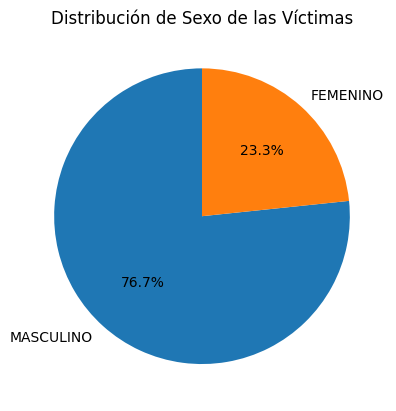

In [163]:
tab10_colors = plt.cm.tab10.colors[:2] 
plt.pie(ocurrencias_por_sexo, labels=ocurrencias_por_sexo.index, autopct='%1.1f%%', colors=tab10_colors, startangle=90)
plt.title('Distribución de Sexo de las Víctimas')
plt.show()

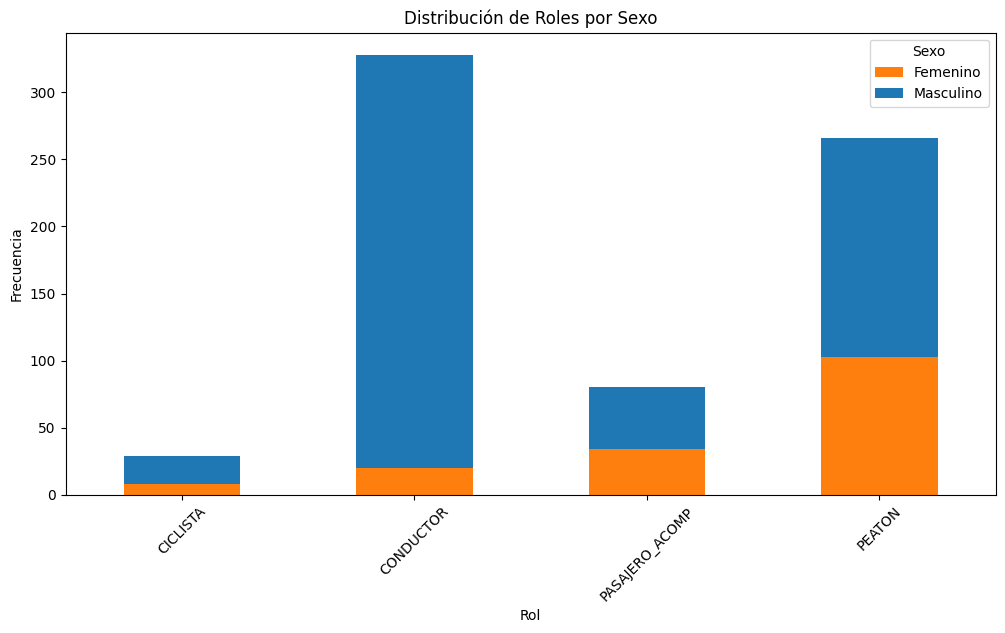

In [169]:
ocurrencias_comp_MF = pd.crosstab(siniestros_caba['ROL'], siniestros_caba['SEXO_VICTIMA'])
tab10_colors = plt.cm.tab10.colors[:2][::-1]
ax = ocurrencias_comp_MF.plot(kind='bar', stacked=True, figsize=(12, 6), color=tab10_colors)

plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')
plt.xticks(rotation=45)
bar_chart = plt.gca().set_xticklabels([label[:14] for label in ocurrencias_comp_MF.index])

plt.show()

En este caso se analiza que la mayoría de las victimas son masculinos, mientras que en mucho menor medida se encuentran las victimas femeninas.

---
---

## Revision de FECHAS

#### Agrupamiento Anual

In [ ]:
siniestros_caba['FECHA'] = pd.to_datetime(siniestros_caba['FECHA'])
suma_por_año = siniestros_caba.groupby(siniestros_caba['FECHA'].dt.year)['N_VICTIMAS'].sum().reset_index()
suma_por_año.columns = ['AÑO', 'Suma_N_VICTIMAS']
suma_por_año.head(len(suma_por_año))

,AÑO,Suma_N_VICTIMAS
0,2016,149
1,2017,160
2,2018,161
3,2019,106
4,2020,88
5,2021,97


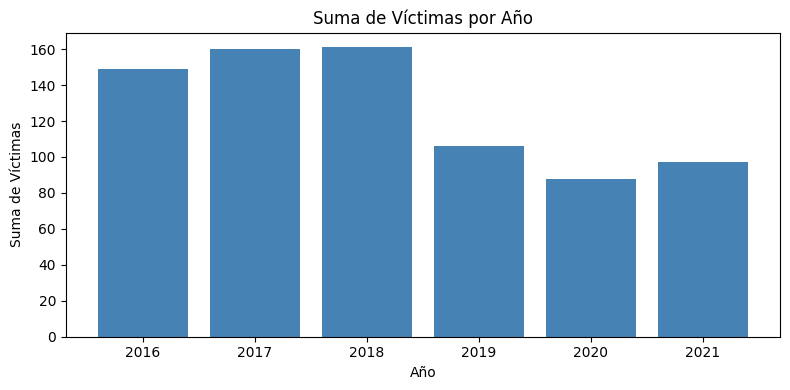

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(suma_por_año['AÑO'], suma_por_año['Suma_N_VICTIMAS'], color='steelblue')
plt.title('Suma de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.tight_layout()
plt.show()

#### Agrupamiento Mensual

In [200]:
siniestros_caba['FECHA'] = pd.to_datetime(siniestros_caba['FECHA'])
suma_por_mes = siniestros_caba.groupby(siniestros_caba['FECHA'].dt.month)['N_VICTIMAS'].sum().reset_index()
suma_por_mes.columns = ['MES', 'Suma_N_VICTIMAS']
suma_por_mes.head(len(suma_por_mes))

,MES,Suma_N_VICTIMAS
0,1,62
1,2,65
2,3,68
3,4,56
4,5,60
5,6,58
6,7,51
7,8,71
8,9,59
9,10,54


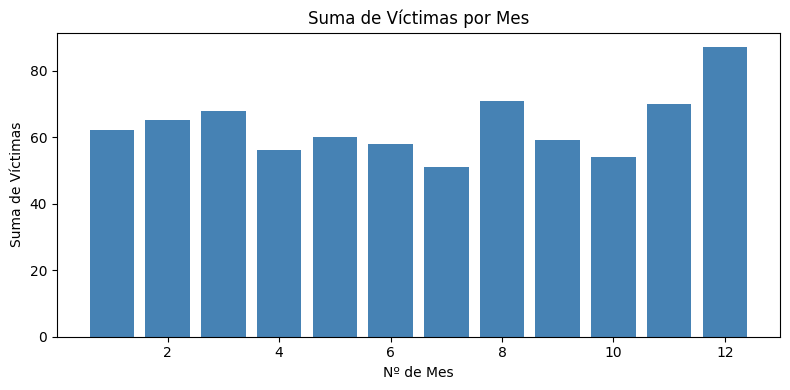

In [203]:
plt.figure(figsize=(8, 4))
plt.bar(suma_por_mes['MES'], suma_por_mes['Suma_N_VICTIMAS'], color='steelblue')
plt.title('Suma de Víctimas por Mes')
plt.xlabel('Nº de Mes')
plt.ylabel('Suma de Víctimas')
plt.tight_layout()
plt.show()

#### Agrupamiento por dia de la Semana

In [204]:
ocurrencias_por_dia = siniestros_caba['DIA_SEMANA'].value_counts().sort_values(ascending=False)
orden_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ocurrencias_por_dia = ocurrencias_por_dia.reindex(orden_dias_semana)
ocurrencias_por_dia.head(len(ocurrencias_por_dia))

DIA_SEMANA
Lunes        107
Martes       101
Miércoles     99
Jueves        96
Viernes      101
Sábado       108
Domingo      105
Name: count, dtype: int64

In [205]:
ocurrencias_por_dia.describe()

count      7.000000
mean     102.428571
std        4.391550
min       96.000000
25%      100.000000
50%      101.000000
75%      106.000000
max      108.000000
Name: count, dtype: float64

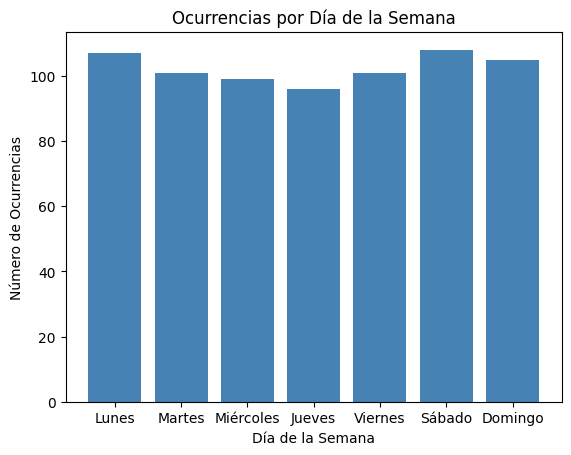

In [225]:
plt.bar(ocurrencias_por_dia.index, ocurrencias_por_dia.values, color='steelblue')
plt.title('Ocurrencias por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Ocurrencias')
plt.show()

El análisis de las fechas refleja 3 situaciones temporales interesantes. En el caso de los dias de la semana, los accidentes fatales se sitúan ligeramente en torno al fin de semana. Para los meses del año se encuentra diciembre como mes de mayor siniestralidad. Y finalmente para el análisis anual, se puede ver que en el año 2020 los homicidios vehiculares se redujeron notablemente debido al confinamiento producto del COVID, y luego del fin del mismo comienzan a aumentar levemente.

---
---

## RANGO ETARIO, EDADES

In [136]:
ocurrencias_por_barrio = siniestros_caba['RANGO_ETARIO'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

RANGO_ETARIO
 Entre 15 & 30    210
Entre 30 & 45     201
Entre 45 & 60     103
Entre 60 & 75      72
Entre 75 & 90      63
Name: count, dtype: int64

In [137]:
ocurrencias_por_EDAD = siniestros_caba['EDAD'] # [(siniestros_caba['EDAD'] != 'NaN') & (siniestros_caba['EDAD'] != 0.0)]
conteo_EDAD_VICTIMA = ocurrencias_por_EDAD.value_counts()
conteo_EDAD_VICTIMA = conteo_EDAD_VICTIMA.sort_index()

In [138]:
conteo_EDAD_VICTIMA.head()

EDAD
1.0     2
4.0     2
5.0     1
7.0     1
10.0    2
Name: count, dtype: int64

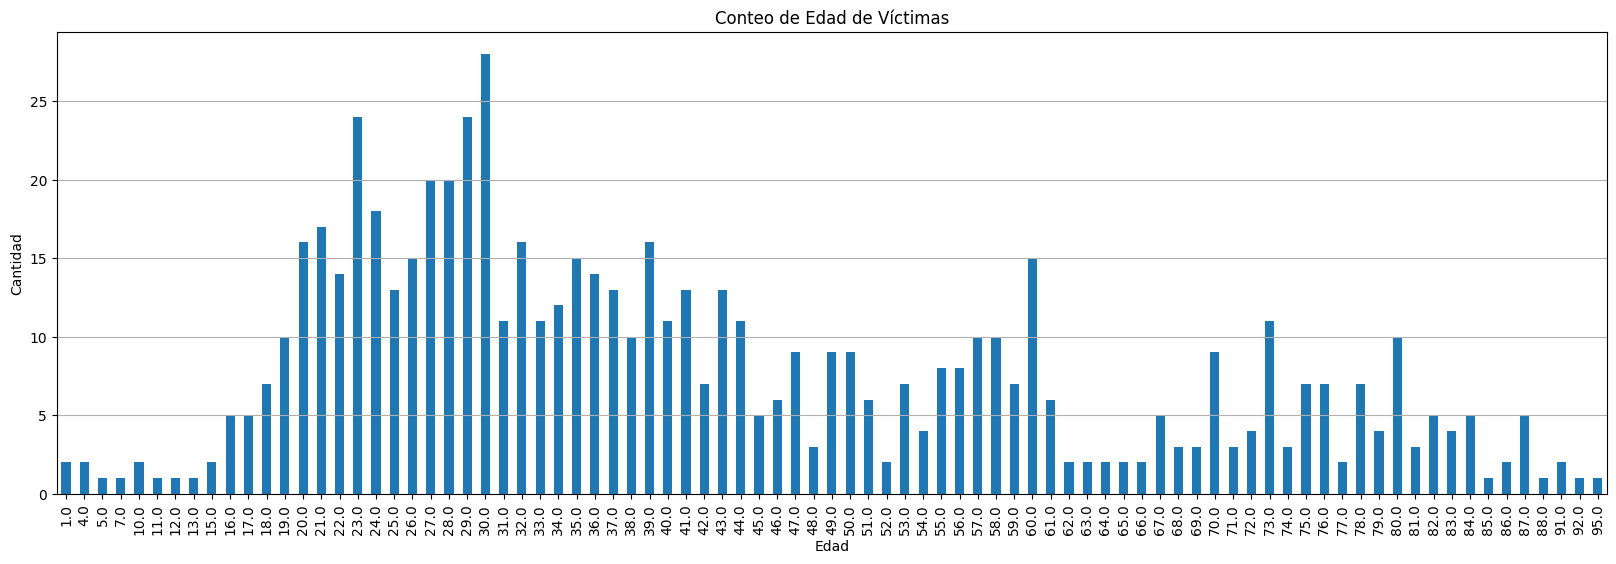

In [139]:
plt.figure(figsize=(20, 6))
conteo_EDAD_VICTIMA.plot(kind='bar')
plt.title('Conteo de Edad de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.grid(axis='y')  # Agrega líneas de la cuadrícula en el eje Y
plt.show()


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_3691/3595294063.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)


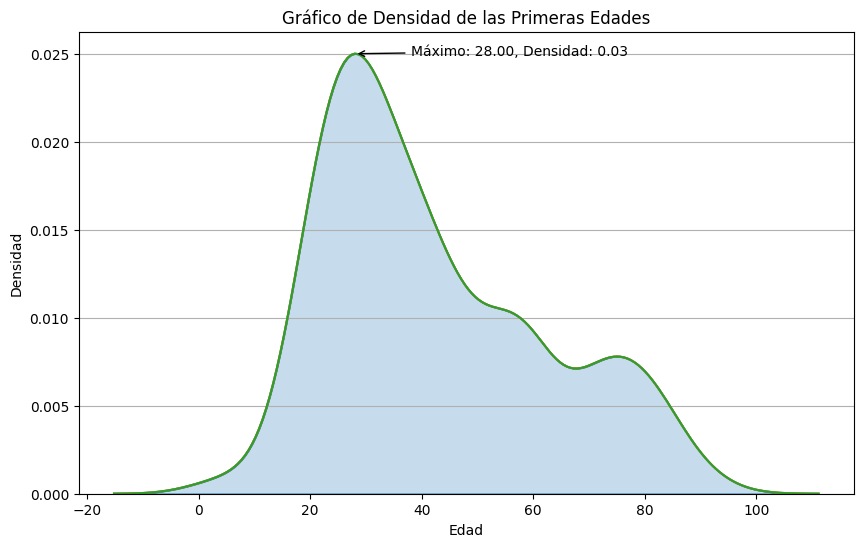

In [142]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=siniestros_caba['EDAD'], shade=True)

max_density_index = np.argmax(sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[1])
max_density_value = sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[1][max_density_index]
corresponding_x_value = sns.kdeplot(data=siniestros_caba['EDAD']).get_lines()[0].get_data()[0][max_density_index]

plt.annotate(f'Máximo: {corresponding_x_value:.2f}, Densidad: {max_density_value:.2f}', 
             xy=(corresponding_x_value, max_density_value), 
             xytext=(corresponding_x_value + 10, max_density_value - 0.0001),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Gráfico de Densidad de las Primeras Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()


Partiendo del estudio etario, se sabe que mayormente las victimas son mas bien jovenes, en torno a los 28 años de edad.

---
---

## FRANJA HORARIA

In [236]:
ocurrencias_por_franja_hora = siniestros_caba['FRANJA'].value_counts().sort_values(ascending=False)
ocurrencias_por_franja_hora.head()

FRANJA
06:00-12:00    213
18:00-24:00    176
12:00-18:00    169
00:00-06:00    158
Name: count, dtype: int64

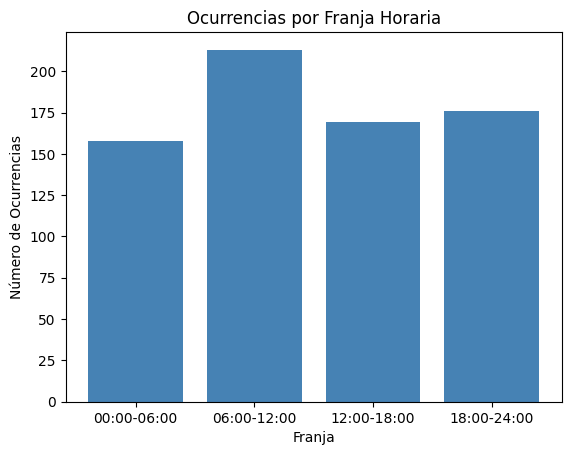

In [237]:
etiquetas_ordenadas = ocurrencias_por_franja_hora.index.sort_values()
plt.bar(etiquetas_ordenadas, ocurrencias_por_franja_hora[etiquetas_ordenadas], color='steelblue')
plt.title('Ocurrencias por Franja Horaria')
plt.xlabel('Franja')
plt.ylabel('Número de Ocurrencias')
plt.show()

In [145]:
ocurrencias_por_barrio = siniestros_caba['HORA'].value_counts().sort_values(ascending=False)
ocurrencias_por_barrio.head()

HORA
05:00:00    11
12:30:00    10
09:00:00    10
21:00:00    10
16:00:00    10
Name: count, dtype: int64

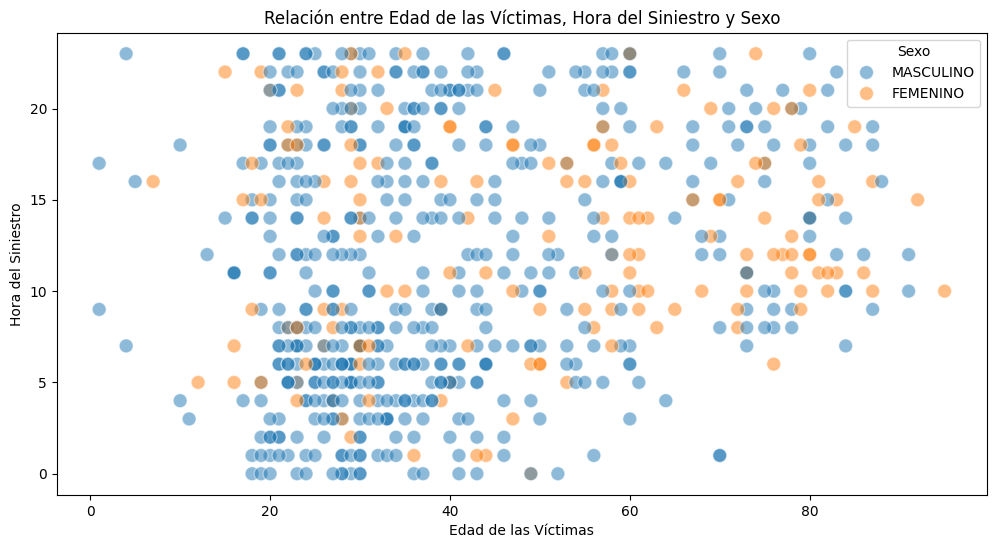

In [222]:
data = siniestros_caba.groupby(['EDAD', "FRANJA_HORA",'SEXO_VICTIMA'])['N_VICTIMAS'].sum().reset_index()
data["EDAD"]=data["EDAD"].astype("Int64")
data["FRANJA_HORA"]=data["FRANJA_HORA"].astype("Int64")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=siniestros_caba, x='EDAD', y='FRANJA_HORA', hue='SEXO_VICTIMA', alpha=0.5, palette='tab10', s=100)
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')
plt.legend(title='Sexo')
plt.show()


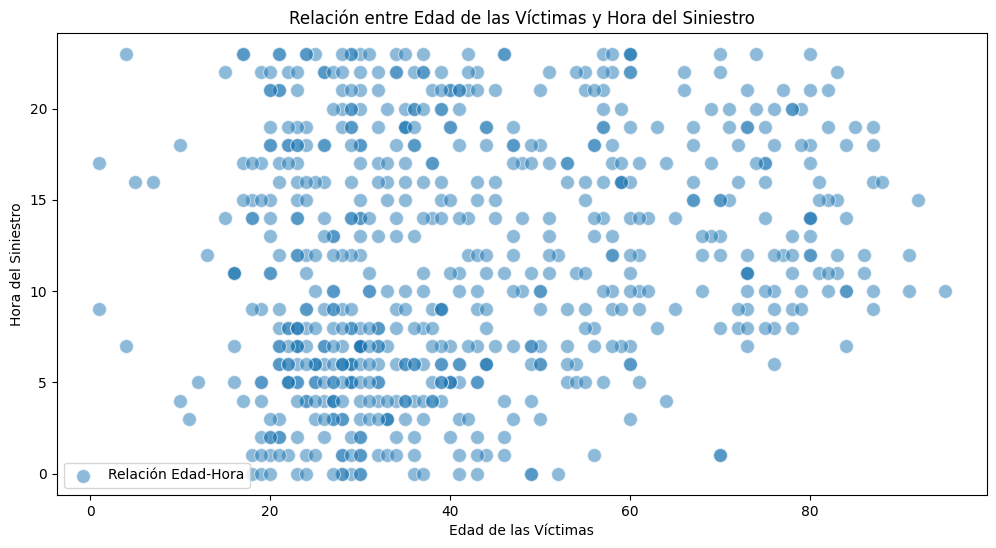

In [224]:
data = siniestros_caba.groupby(['EDAD', "FRANJA_HORA"])['N_VICTIMAS'].sum().reset_index()
data["EDAD"]=data["EDAD"].astype("Int64")
data["FRANJA_HORA"]=data["FRANJA_HORA"].astype("Int64")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=siniestros_caba, x='EDAD', y='FRANJA_HORA', alpha=0.5, label='Relación Edad-Hora',s=100)
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')
plt.show()


Finalmente en el análisis por franja horaria y de las edades, se puede ver nuevamente que las victimas son jovenes y además dicho cluster refleja que los horarios de circulación son en la madrugada. Esto podría llevar a pensar por ejemplo, que son individuos que se encuentran retornando a sus hogares luego de alguna salida nocturna y tambien personas que se encuentran en tránsito hacia sus trabajos a primera hora del dia.